In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [26]:
# !pip install ydata-profiling
# !pip install xgboost

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
data_train.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [6]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data_train.isnull().sum()/data_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
numerical_cols = [col for col in data_train.columns if data_train[col].dtype!='object']
categorical_cols = [col for col in data_train.columns if data_train[col].dtype=='object']
print("Numerical cols are :",numerical_cols,"\nCategorical cols are :",categorical_cols)

Numerical cols are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
Categorical cols are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


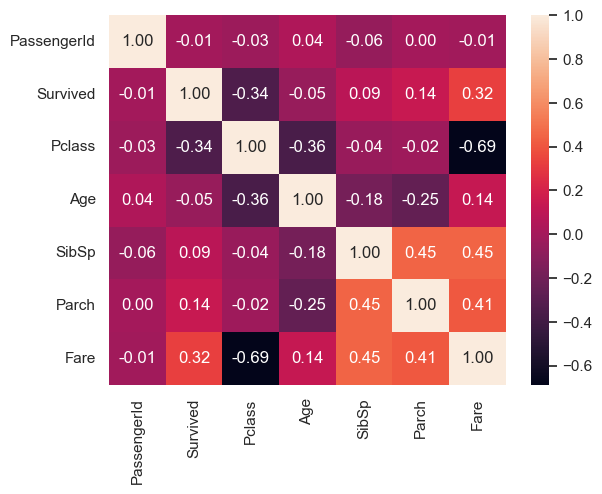

In [9]:
%matplotlib inline
sns.heatmap(data_train[numerical_cols].corr('spearman'),annot=True, fmt=".2f")
plt.show()

## Using Pandas Profiling library for Data Visualisation and EDA

In [15]:
# pip install ydata-profiling

from ydata_profiling import ProfileReport
profile = ProfileReport(data_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
unique_values = {}
for column in data_train.columns:
    unique_values[column] = [len(data_train[column].unique()),len(data_train[column].unique())/data_train[column].notnull().sum()*100]
unique_values    

{'PassengerId': [891, 100.0],
 'Survived': [2, 0.22446689113355783],
 'Pclass': [3, 0.33670033670033667],
 'Name': [891, 100.0],
 'Sex': [2, 0.22446689113355783],
 'Age': [89, 12.46498599439776],
 'SibSp': [7, 0.7856341189674524],
 'Parch': [7, 0.7856341189674524],
 'Ticket': [681, 76.43097643097643],
 'Fare': [248, 27.83389450056117],
 'Cabin': [148, 72.54901960784314],
 'Embarked': [4, 0.44994375703037126]}

## Dropping Unwanted Columns

#### ***By seeing the values of PassengerId (contains a unique ID for every individual),Name (unique name for each individual),Ticket (Ticket details ,etc),Cabin (contains 77% of missing values), We conclude that  we should drop these columns from our dataset both train and test***

In [17]:
data_train.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'],inplace=True)
data_test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'],inplace=True)

In [18]:
numerical_cols = [col for col in data_train.columns if data_train[col].dtype!='object']
categorical_cols = [col for col in data_train.columns if data_train[col].dtype=='object']
print("Numerical cols are :",numerical_cols,"\nCategorical cols are :",categorical_cols)

Numerical cols are : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
Categorical cols are : ['Sex', 'Embarked']


## Handle Categorical Variables by converting them into Discrete nummbers

In [19]:
data_copy = data_train.copy()
for column in categorical_cols:
     data_copy[column] = pd.factorize(data_copy[column])[0]
print(data_copy['Sex'].value_counts(),data_copy['Embarked'].value_counts())


0    577
1    314
Name: Sex, dtype: int64  0    644
 1    168
 2     77
-1      2
Name: Embarked, dtype: int64


## Handle Missing values using KNN imputer

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7)
data_train_cleaned = imputer.fit_transform(data_copy)
pd.DataFrame(data_train_cleaned,columns=data_copy.columns).isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
er = pd.DataFrame(data_train_cleaned,columns=data_copy.columns)
er.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       0.0     3.0  0.0  22.0    1.0    0.0   7.2500       0.0
1       1.0     1.0  1.0  38.0    1.0    0.0  71.2833       1.0
2       1.0     3.0  1.0  26.0    0.0    0.0   7.9250       0.0
3       1.0     1.0  1.0  35.0    1.0    0.0  53.1000       0.0
4       0.0     3.0  0.0  35.0    0.0    0.0   8.0500       0.0

## Standard Scaling the  cleaned dataset

In [22]:
from sklearn.preprocessing import StandardScaler
scaler_t = StandardScaler()
er = pd.DataFrame(scaler_t.fit_transform(er.drop('Survived',axis=1)),columns=data_copy.columns[1:])
er['Survived'] = data_copy['Survived']
er.head()


Pclass       Sex       Age     SibSp     Parch      Fare  Embarked  \
0  0.827377 -0.737695 -0.589801  0.432793 -0.473674 -0.502445 -0.562619   
1 -1.566107  1.355574  0.596091  0.432793 -0.473674  0.786845  1.003923   
2  0.827377  1.355574 -0.293328 -0.474545 -0.473674 -0.488854 -0.562619   
3 -1.566107  1.355574  0.373736  0.432793 -0.473674  0.420730 -0.562619   
4  0.827377 -0.737695  0.373736 -0.474545 -0.473674 -0.486337 -0.562619   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

In [23]:
er.head()

Pclass       Sex       Age     SibSp     Parch      Fare  Embarked  \
0  0.827377 -0.737695 -0.589801  0.432793 -0.473674 -0.502445 -0.562619   
1 -1.566107  1.355574  0.596091  0.432793 -0.473674  0.786845  1.003923   
2  0.827377  1.355574 -0.293328 -0.474545 -0.473674 -0.488854 -0.562619   
3 -1.566107  1.355574  0.373736  0.432793 -0.473674  0.420730 -0.562619   
4  0.827377 -0.737695  0.373736 -0.474545 -0.473674 -0.486337 -0.562619   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0

## Best Model Selection :

In [27]:
# Split data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report

df = er.copy()
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

# Define algorithms and hyperparameter ranges
algorithms = {
    'Logistic Regression': {'model': LogisticRegression(penalty='l2', C=1.0), 'params': {}},
    'SVM': {'model': SVC(kernel='rbf'), 'params': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}},
    'XGBoost': {'model': XGBClassifier(), 'params': {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 8]}},
    'Random Forest': {'model': RandomForestClassifier(n_estimators=100), 'params': {'max_depth': [3, 5, 8], 'n_estimators': [100, 200, 500]}}
}

# Evaluate and compare algorithms
results = {}
for name, config in algorithms.items():
    model = config['model']
    params = config['params']

    # Train-test-split for nested cross-validation
    from sklearn.model_selection import StratifiedKFold

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_cv, X_test_cv, y_train_cv, y_test_cv = X_train.iloc[train_index], X_train.iloc[test_index], y_train.iloc[train_index], y_train.iloc[test_index]

        # GridSearchCV for hyperparameter tuning
        from sklearn.model_selection import GridSearchCV

        grid_search = GridSearchCV(model, params, scoring='f1_macro', cv=skf)
        grid_search.fit(X_train_cv, y_train_cv)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_cv)
        scores.append(f1_score(y_test_cv, y_pred, average='macro'))

    # Average score and performance metrics
    avg_score = np.mean(scores)
    metrics = classification_report(y_test, best_model.predict(X_test))

    results[name] = {'avg_score': avg_score, 'metrics': metrics}

# Print and compare results
print("================== Evaluation Results ==================")
for name, result in results.items():
    print(f"{name}:")
    print(f"- Average F1-score (macro): {result['avg_score']:.4f}")
    print(f"- Classification Report:\n{result['metrics']}")
    print("-----------------------------------------------------")

# Select the best algorithm based on your evaluation criteria
best_algorithm = max(results, key=lambda name: results[name]['avg_score'])
print(f"\nBest Algorithm: {best_algorithm}")

# Further refinements (optional):
# - Explore different evaluation metrics and weights based on your domain.
# - Consider feature importance analysis to understand feature impacts.
# - Experiment with different preprocessing techniques or algorithms.


================== Evaluation Results ==================
Logistic Regression:
- Average F1-score (macro): 0.7815
- Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

-----------------------------------------------------
SVM:
- Average F1-score (macro): 0.8149
- Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

-----------------------------------------------------
XGBoost:
- Average F1-score (macro)

## HyperParameter Tuning

In [29]:
df = er.copy()
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

hyperparameter_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 8],
    "learning_rate": [0.01, 0.1, 0.3],
    "gamma": [0, 0.1, 0.3],
    "colsample_bytree": [0.5, 0.7, 1],
}

# Start with a smaller grid for quicker exploration (optional)
# hyperparameter_grid = {
#     "n_estimators": [50, 100],
#     "max_depth": [3, 5],
#     "learning_rate": [0.01, 0.1],
#     "gamma": [0, 0.1],
#     "colsample_bytree": [0.5, 0.7],
# }

# Create XGBoost classifier with early stopping to prevent overfitting
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",  # Consider using AUC for imbalanced datasets
    use_label_encoder=False,  # For categorical features (if applicable)
#     early_stopping_rounds=5,  # Adjust based on data and patience
)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    xgb_model, param_grid=hyperparameter_grid, scoring="accuracy", cv=5, n_jobs=-1)

# Fit the model with early stopping
grid_search.fit(X_train, y_train)

# Get the best-performing model from the search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", best_model.get_params())

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


## Saving Best model and  Standard Scaler 

In [ ]:
import joblib  # For saving/loading models

joblib.dump(best_model, "model.pkl")
joblib.dump(scaler_t, "scaler_t.pkl")